Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Техника бутстрап применилась корректно, было проведено тщательное исследование и выбран правильный регион!
- Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту


# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

Посмторим как выглядят данные 3х районов

In [3]:
display(df1.head())
df1.info()
df1.describe()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
display(df2.head())
df2.info()
df2.describe()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [5]:
display(df3.head())
df3.info()
df3.describe()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
display(df2.loc[df2['product'] == 0])

,id,f0,f1,f2,product
11,OXyvW,16.320755,-0.562946,-0.001783,0.0
13,igmai,6.695604,-0.749449,-0.007630,0.0
62,Qjy5w,21.418478,-5.134490,-0.002836,0.0
63,G6WCj,6.822701,3.104979,-0.000723,0.0
77,MzQhL,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...,...
99936,YrRU8,5.085749,-3.980305,0.005063,0.0
99948,Jbnur,8.277805,-9.178818,0.003275,0.0
99956,aV1cJ,13.343983,-1.290200,0.005980,0.0
99961,Zjbn2,13.854163,-11.528089,-0.005556,0.0


In [7]:
display(df3.loc[df3['product'] == 0])

,id,f0,f1,f2,product
68149,qeefd,-0.865596,-1.615247,-4.126441,0.0


Пропусков в данных не обнаружено.  

Во втором регионе более 8% тестов с нулевым запасом нефти в скважине,возможно ошибка в данных.  

Удалим столбец id, тк он нам не понадобиться.

In [8]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены, но можно было бы еще как минимум изучить корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


### Разделение выборок

Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [9]:
def train_valid_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [10]:
features_train_df1, features_valid_df1, target_train_df1, target_valid_df1 = train_valid_split(df1, 'product')

In [11]:
features_train_df2, features_valid_df2, target_train_df2, target_valid_df2 = train_valid_split(df2, 'product')

In [12]:
features_train_df3, features_valid_df3, target_train_df3, target_valid_df3 = train_valid_split(df3, 'product')

## Обучение и проверка модели

In [13]:
model1 = LinearRegression()

model1.fit(features_train_df1, target_train_df1)
predicted_target_df1 = model1.predict(features_valid_df1)
print('RMSE -', mean_squared_error(target_valid_df1, predicted_target_df1)**0.5)

RMSE - 37.5794217150813


In [14]:
model2 = LinearRegression()

model2.fit(features_train_df2, target_train_df2)
predicted_target_df2 = model2.predict(features_valid_df2)
print('RMSE -', mean_squared_error(target_valid_df2, predicted_target_df2)**0.5)

RMSE - 0.893099286775617


In [15]:
model3 = LinearRegression()

model3.fit(features_train_df3, target_train_df3)
predicted_target_df3 = model3.predict(features_valid_df3)
print('RMSE -', mean_squared_error(target_valid_df3, predicted_target_df3)**0.5)

RMSE - 40.02970873393434


In [16]:
def oil_predict(target_valid,predicted_target):
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum_pred = data_frame['predicted_product'].sum()
    oil_sum_real = data_frame['real_product'].sum()
    print(data_frame.head())
    print('RMSE -', rmse)
    print('Cредний запас предсказанного сырья -', mean) 
    print('Суммарный предсказанный запас', oil_sum_pred)
    print('Суммарный реальный запас', oil_sum_real)
    return data_frame, rmse, mean, oil_sum_pred

In [17]:
df1_predicted, df1_rmse, df1_predicted_mean, df1_predicted_sum = oil_predict(target_valid_df1, predicted_target_df1)

       real_product  predicted_product
71751     10.038645          95.894952
80493    114.551489          77.572583
2655     132.603635          77.892640
53233    169.072125          90.175134
91141    122.325180          70.510088
RMSE - 37.5794217150813
Cредний запас предсказанного сырья - 92.59256778438035
Суммарный предсказанный запас 2314814.194609509
Суммарный реальный запас 2301964.918520732


In [18]:
df2_predicted, df2_rmse, df2_predicted_mean, df2_predicted_sum = oil_predict(target_valid_df2, predicted_target_df2)

       real_product  predicted_product
71751     80.859783          82.663314
80493     53.906522          54.431786
2655      30.132364          29.748760
53233     53.906522          53.552133
91141      0.000000           1.243856
RMSE - 0.893099286775617
Cредний запас предсказанного сырья - 68.728546895446
Суммарный предсказанный запас 1718213.67238615
Суммарный реальный запас 1718078.4006089992


In [19]:
df3_predicted, df3_rmse, df3_predicted_mean, df3_predicted_sum = oil_predict(target_valid_df3, predicted_target_df3)

       real_product  predicted_product
71751     61.212375          93.599633
80493     41.850118          75.105159
2655      57.776581          90.066809
53233    100.053761         105.162375
91141    109.897122         115.303310
RMSE - 40.02970873393434
Cредний запас предсказанного сырья - 94.96504596800489
Суммарный предсказанный запас 2374126.1492001223
Суммарный реальный запас 2372105.8202213594


**Промежуточный Вывод:**  
Суммарные запасы предсказанные незначительно отличаются от реальных во всех регионах.  
Наилучший показатель RMSE во втором регионе, так как в выборке имеется большое количество нулевых значений и достаточно низкий средний запас сырья, второй регион мы рассматривать не будем.


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 


## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных

In [20]:
BUDGET = 1e+07
SCOUTING_WELL = 500
BEST_WELL = 200
COST_PER_BARREL  = 450


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `10_000_000`.
</div> 


In [21]:
print('Средняя прибыль лучшей скважины:', BUDGET / BEST_WELL, 'тыс.руб.')
print('Средний объем нефти в скважине:', BUDGET / BEST_WELL  / COST_PER_BARREL, 'тыс. барелей')
print('Средний объем нефти на регион:',BUDGET / COST_PER_BARREL, 'тыс. барелей')

Средняя прибыль лучшей скважины: 50000.0 тыс.руб.
Средний объем нефти в скважине: 111.11111111111111 тыс. барелей
Средний объем нефти на регион: 22222.222222222223 тыс. барелей


In [22]:
print('Средний реальный запас нефти на скважину в регионе 1', df1['product'].mean())
print('Средний реальный запас нефти на скважину в регионе 2', df2['product'].mean())
print('Средний реальный запас нефти на скважину в регионе 3', df3['product'].mean())

Средний реальный запас нефти на скважину в регионе 1 92.50000000000001
Средний реальный запас нефти на скважину в регионе 2 68.82500000000002
Средний реальный запас нефти на скважину в регионе 3 95.00000000000004


Создадим фунцию для вывода гистограммы распределения по объему скважин

In [23]:
def hist(col, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])
    plt.hist(col, bins=bins)
    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])
    plt.xlabel("Объем нефти в скважине, тыс. барелей")
    plt.ylabel("Кол-во скважин, шт")
    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

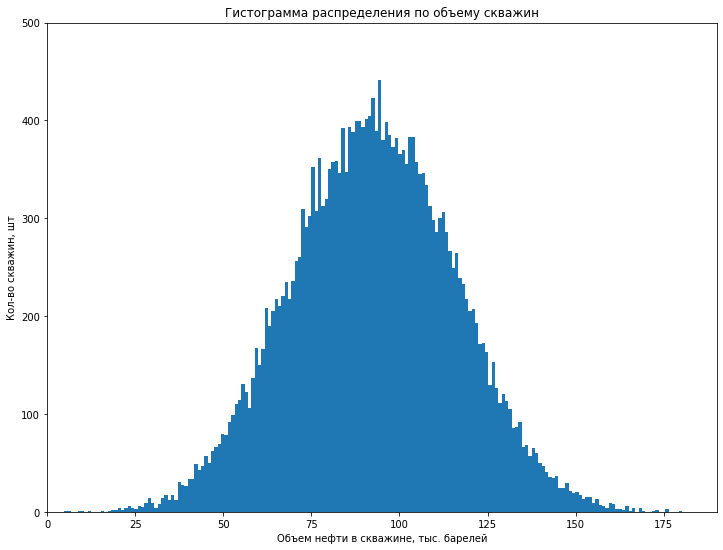

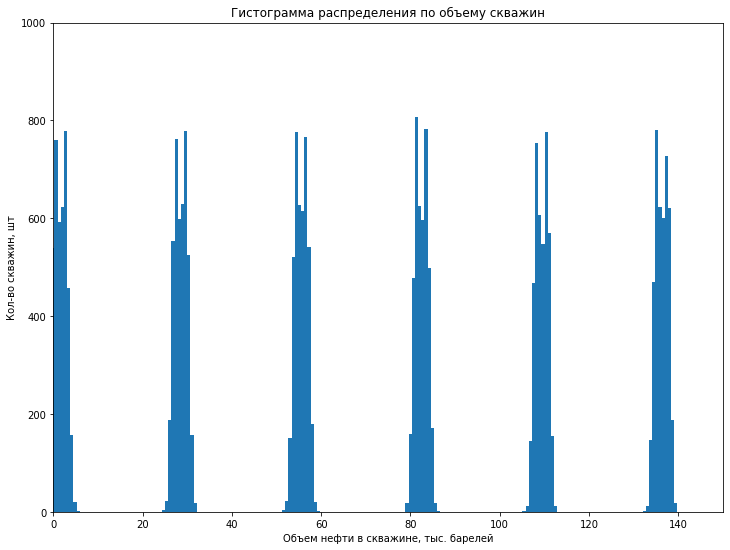

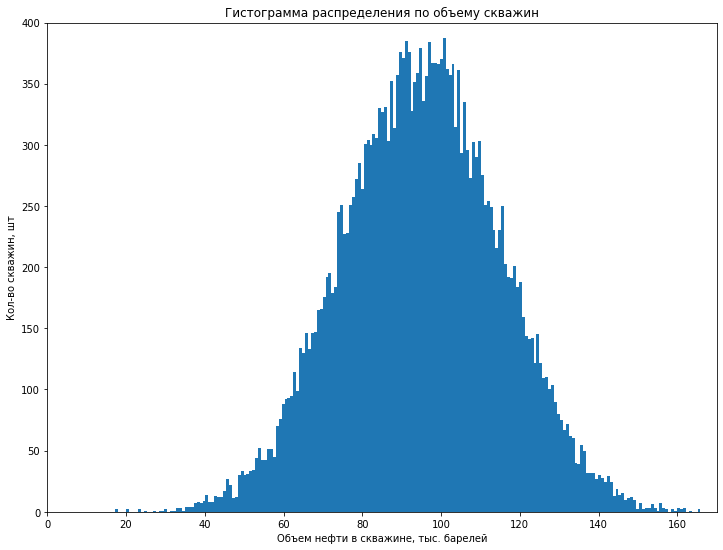

In [24]:
hist(df1_predicted['predicted_product'], 200, 190, 500)
hist(df2_predicted['predicted_product'], 200, 150, 1000)
hist(df3_predicted['predicted_product'], 200, 170, 400)

Промежуточный вывод:  
Средние запасы нефти на скважину в 1 и 3 регионе близки к значениям по условию задачи. Из гистограмм видно, что значений больше 110тыс барелей достаточное количество, чтобы остановить свой выбор на 1 и 3 регионе.
Во втором регионе распределение по объему нефти в скаважинах неравномерное, но если значение не нулевое, то запасы в скважинах с большим объемом чем в 1 и 3 регионах.


<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


Создадим функцию для подсчета прибыли

In [25]:
def calculation_profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return COST_PER_BARREL * selected.sum() - BUDGET

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок

In [26]:
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=SCOUTING_WELL)
        probs_sample = probs[target_sample.index]
        profit = calculation_profit(target, probs_sample, BEST_WELL)
        if profit < 0:
            lost +=1
        values.append(profit)    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average))
    print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower, upper))
    print('Риск {:.1%}'.format(risk))

<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке, метрики считаются верным образом!  
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Риски можно лаконично считать в 1 строку: `(values < 0).mean() * 100`
</div>           

**Расчет для первого региона**

In [27]:
display(bootstrap_1000(df1_predicted['real_product'], df1_predicted['predicted_product']))

Средняя прибыль по региону = 396164.98 тыс.руб.
95% доверительный интервал от -111215.55 до 909766.94 тыс.руб.
Риск 6.9%


None

**Расчет для второго региона**

In [28]:
display(bootstrap_1000(df2_predicted['real_product'], df2_predicted['predicted_product']))

Средняя прибыль по региону = 461155.82 тыс.руб.
95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
Риск 0.7%


None

**Расчет для первого региона**

In [29]:
display(bootstrap_1000(df3_predicted['real_product'], df3_predicted['predicted_product']))

Средняя прибыль по региону = 392950.48 тыс.руб.
95% доверительный интервал от -112227.63 до 934562.91 тыс.руб.
Риск 6.5%


None

## ВЫВОД

По результатам исследования, лучшим регионом для разработки скважин является второй регион.  
На выбор повлияли следующие причины:  
- Наименьшая вероятность убытков, всего 0.7%, против более 6% риска в 1 и 3 регионе.
- Положительная нижняя граница доверительного интервала
- Средняя прибыль по региону выше остальных


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>



<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо за оперативную проверку и доп материалы, поправил по твоему совету константы, остальное изучу на досуге!
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 🤝
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован